📘 1. Jupyter sveska: product_classification_analysis.ipynb

Sadrži kompletnu analizu:

🔹 Uvod i pregled podataka

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product ID       35311 non-null  int64  
 1   Product Title    35139 non-null  object 
 2   Merchant ID      35311 non-null  int64  
 3    Category Label  35267 non-null  object 
 4   _Product Code    35216 non-null  object 
 5   Number_of_Views  35297 non-null  float64
 6   Merchant Rating  35141 non-null  float64
 7    Listing Date    35252 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB


<Axes: title={'center': 'Distribucija kategorija'}, xlabel=' Category Label'>

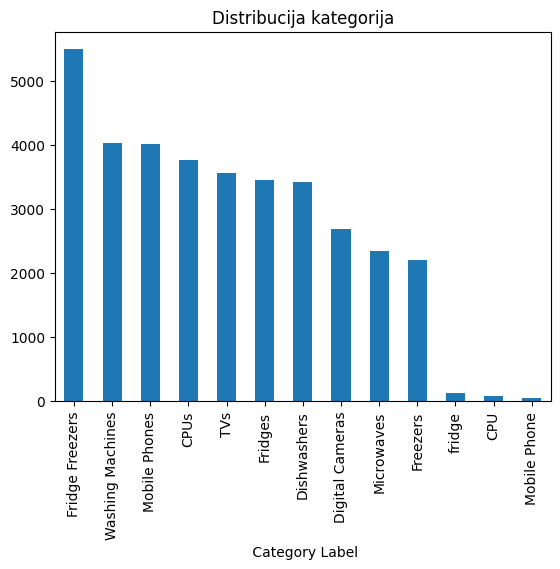

In [11]:
import pandas as pd
df = pd.read_csv("../data/products.csv")
df.info()
df[' Category Label'].value_counts().plot(kind='bar', title='Distribucija kategorija')

🔹 Čišćenje i inženjering karakteristika
- Ukloni duplikate i prazne vrednosti
- Ekstrahuj ključne reči iz Product Title
- Koristi TfidfVectorizer za tekstualne podatke


🔹 Treniranje modela

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df.columns = df.columns.str.strip()
df = df.dropna(subset=['Product Title', 'Category Label'])

X = df['Product Title']
y = df['Category Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

             CPU       0.00      0.00      0.00        21
            CPUs       0.98      1.00      0.99       937
 Digital Cameras       1.00      0.99      1.00       672
     Dishwashers       0.96      0.91      0.94       851
        Freezers       0.95      0.90      0.93       550
 Fridge Freezers       0.89      0.95      0.92      1368
         Fridges       0.86      0.89      0.88       859
      Microwaves       0.99      0.96      0.97       582
    Mobile Phone       0.00      0.00      0.00        14
   Mobile Phones       0.98      0.99      0.98      1000
             TVs       0.98      0.99      0.99       885
Washing Machines       0.96      0.95      0.96      1004
          fridge       0.00      0.00      0.00        31

        accuracy                           0.95      8774
       macro avg       0.73      0.73      0.73      8774
    weighted avg       0.94      0.95      0.95      8774



🔹 Vizualizacija performansi
- Matrica zabune
- F1 skor po kategoriji
